In [1]:
from fastai.vision import *
import cv2
import os
import glob
from tqdm import tqdm_notebook

print(torch.cuda.is_available())
print(os.getcwd())
torch.cuda.empty_cache()

True
/home/lh2910


In [2]:
labels = pd.read_csv('/home/lh2910/list_attr_celeba.csv')
labels.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [3]:
os.chdir('/home/lh2910/faces')
path = os.getcwd()
extracted_faces = glob.glob('*.jpg')
extracted_faces.sort()

A = set(extracted_faces)
slices = []
for i in labels.loc[:, 'image_id']:
    if i in A:
        slices.append(True)
    else:
        slices.append(False)

attr = labels.loc[slices, ['image_id', 'Bags_Under_Eyes', 'Bangs', 'Eyeglasses', 'Male', 'Mouth_Slightly_Open', 'Smiling', 'Wearing_Lipstick', 'Young']]
attr.head()

,image_id,Bags_Under_Eyes,Bangs,Eyeglasses,Male,Mouth_Slightly_Open,Smiling,Wearing_Lipstick,Young
0,000001.jpg,-1,-1,-1,-1,1,1,1,1
1,000002.jpg,1,-1,-1,-1,1,1,-1,1
4,000005.jpg,-1,-1,-1,-1,-1,-1,1,1
5,000006.jpg,-1,-1,-1,-1,1,-1,1,1
6,000007.jpg,1,-1,-1,1,-1,-1,-1,1


In [4]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      p_affine=.75, p_lighting=.75,
                      max_lighting=.2, max_rotate=10, max_warp=.2, max_zoom=1.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.347901,0.345192,0.836784,38:21
1,0.337327,0.339682,0.840438,38:06
2,0.329978,0.335590,0.840032,38:06
3,0.335990,0.329668,0.844093,38:09
4,0.328828,0.329668,0.843822,38:06


Label: -1
Prediction: (Category -1, tensor(0), tensor([0.9691, 0.0309]))


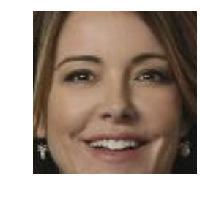

In [5]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=1)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/bags_under_eyes_resnet50')
learn.export('/home/lh2910/models/bags_under_eyes_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.108306,0.089148,0.964948,38:11
1,0.101462,0.085639,0.966301,38:09
2,0.102767,0.086449,0.964136,38:07
3,0.096342,0.086208,0.965219,38:07
4,0.095892,0.087251,0.965895,38:10


Label: -1
Prediction: (Category -1, tensor(0), tensor([0.9973, 0.0027]))


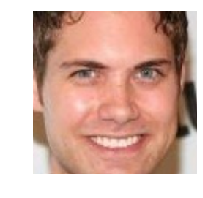

In [6]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=2)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/bangs_resnet50')
learn.export('/home/lh2910/models/bangs_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

In [ ]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=3)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/eyeglasses_resnet50')
learn.export('/home/lh2910/models/eyeglasses_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.017095,0.015856,0.995669,38:07
1,0.014936,0.009450,0.998105,38:08
2,0.006218,0.009929,0.998105,38:04


Label: -1
Prediction: (Category -1, tensor(0), tensor([1.0000e+00, 1.1847e-06]))


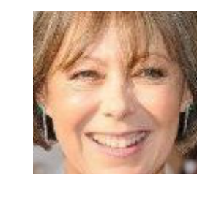

In [8]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=4)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/male_resnet50')
learn.export('/home/lh2910/models/male_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.157539,0.137549,0.944241,38:09
1,0.141987,0.130647,0.948978,38:08
2,0.142948,0.125754,0.949249,38:09
3,0.134236,0.128653,0.949790,38:11
4,0.129806,0.134499,0.950061,38:08


Label: -1
Prediction: (Category -1, tensor(0), tensor([9.9982e-01, 1.8069e-04]))


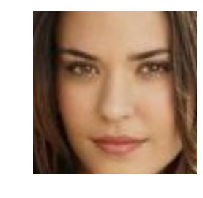

In [ ]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=5)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/mouth_slightly_open_resnet50')
learn.export('/home/lh2910/models/mouth_slightly_open_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.206228,0.186311,0.924347,38:13
1,0.186507,0.172784,0.928407,38:10
2,0.179160,0.169992,0.928542,38:07
3,0.179581,0.169843,0.928136,38:09
4,0.180988,0.169740,0.925971,38:12


Label: 1
Prediction: (Category 1, tensor(1), tensor([8.1097e-04, 9.9919e-01]))


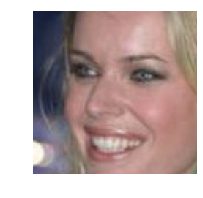

In [ ]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=6)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/smiling_resnet50')
learn.export('/home/lh2910/models/smiling_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.169610,0.142429,0.938963,38:10
1,0.153669,0.139165,0.943294,38:09
2,0.144681,0.136442,0.941535,38:08
3,0.142005,0.133672,0.942211,38:10
4,0.133102,0.136652,0.941670,38:16


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Label: 1
Prediction: (Category 1, tensor(1), tensor([0.1070, 0.8930]))


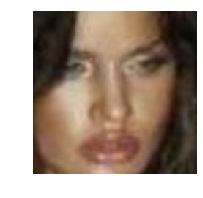

In [ ]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=7)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/wearing_lipstick_resnet50')
learn.export('/home/lh2910/models/wearing_lipstick_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

In [ ]:
torch.cuda.empty_cache()
data = (ImageList.from_df(attr, path=path)
        .split_by_rand_pct(.05)
        .label_from_df(cols=8)
        .transform(tfms, size=224)
        .databunch()
        .normalize())

learn = cnn_learner(data, models.resnet50, metrics=[accuracy])
learn.fit(5)

learn.save('/home/lh2910/models/young_resnet50')
learn.export('/home/lh2910/models/young_resnet50.pkl')

img, category = data.valid_ds[150]
print('Label:', category)
print('Prediction:', learn.predict(img))
img.show()

epoch,train_loss,valid_loss,accuracy,time
0,0.298720,0.276676,0.883069,38:10
1,0.272727,0.262005,0.889295,38:11
2,0.268376,0.259951,0.890378,38:12
3,0.260685,0.264589,0.894844,38:10


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

